In [1]:
# -*- coding: utf-8 -*-
"""
2018-06-28,29

Blinker analysis: PL intensity versus laser power
PL intensity versus laser power, QE 4-22-2018.11,00am

@author: Viva Horowitz
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
import numpy as np
import sys
sys.path.append(r'C:\Users\Viva\Documents')
sys.path.append(r'C:\Users\Viva\Documents\detect_peaks.py')
import detect_peaks
## http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb
from detect_peaks import detect_peaks


sns.set(style='ticks')
sns.set_context('poster')

%pylab inline
from matplotlib.mlab import frange

# ** set for each dataset
datadate = '2018-06-01'
datafolder = r'O:\User\Viva\data\2018-06-01_blinking-statistics\4-22-2018.11,00am'
analysisfolder = r'C:\Users\Viva\Documents\analysis\blinker_analysis\power_dependence,QE4-22-2018.11,00am'
filenames = ['4-22-2018.11,00am, 03, ND2,4.txt',
             '4-22-2018.11,00am, 04, ND2,3.txt',
             '4-22-2018.11,00am, 05, ND2,2.txt',
             '4-22-2018.11,00am, 06, ND2,0.txt',
             '4-22-2018.11,00am, 07, ND1,6.txt',
             '4-22-2018.11,00am, 08, ND1,5.txt',
             '4-22-2018.11,00am, 11, ND1,4.txt',
             '4-22-2018.11,00am, 12, ND1,3.txt',
             '4-22-2018.11,00am, 13, ND1,2.txt',
             '4-22-2018.11,00am, 14, ND1,0.txt']   
dataname = 'QE 4-22-2018.11,00am'
NDlist = [2.4, 2.3, 2.2, 2.0, 1.6, 1.5, 1.4, 1.3, 1.2, 1.0]

print(np.__version__)
print(sns.__version__)
print(pd.__version__)
print(mpl.__version__)

Populating the interactive namespace from numpy and matplotlib
1.10.4
0.8.0
0.20.3
2.1.0


In [2]:
os.chdir(r'O:\User\Viva')
filterwheel = pd.read_csv('Josh_filter_wheel.csv')

In [3]:
# Does not display all digits but they are stored.
filterwheel.head(1)

,ND,Power (W)
0,1.0,0.000995


In [4]:
## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547
def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

def manualnorm(histdata, binwidth):
    return (1/(histdata.sum()*binwidth))*histdata

def arangebylength(start, step, length):
    return np.arange(start = start, stop=start+step*(length-.5), step = step )

# rebin: combine two rows into one.
def rebindata(data, colname, timecolname):
    first = 1 # this is a value that indicates if we're on the first (=1) or the second (-1) of a pair of two bins
    rebinvals = []

    print data.tail()
    for value in data[colname]:
        #print 'value: ' + str(value)
        if first == 1:
            prevval = value
        else:
            # calculate average of the two bins
            combined = (prevval + value) /2.0 
            rebinvals.append(combined)
            del prevval
        first = -1 * first
         
    timesetting = data[timecolname][1]-data[timecolname][0]
    rebintimes = arangebylength(start =0, step = timesetting*2, length = len(rebinvals) )
    datadict = {timecolname: rebintimes, colname: rebinvals}
    rebinneddata = pd.DataFrame( data = datadict)
    return rebinneddata

   Time (s) 2.4   2.4
0         0.008  5.75
1         0.012  6.25
2         0.016  5.50
3         0.020  5.75
4         0.024  6.25
       Time (s) 2.4   2.4
30995       123.988  5.25
30996       123.992  4.50
30997       123.996  6.25
30998       124.000  6.25
30999       124.004  4.25
1
Effective collection rate: 125.0 Hz
Time bin size: 0.008 sec


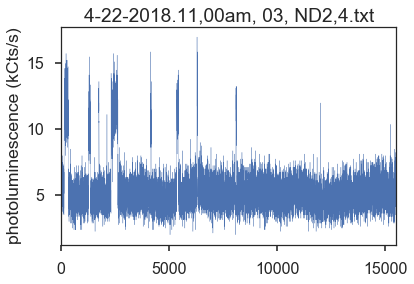

   Time (s) 2.3   2.3
0        17.252  6.50
1        17.256  9.50
2        17.260  5.00
3        17.264  6.50
4        17.268  5.25
       Time (s) 2.3    2.3
74994       317.228  19.75
74995       317.232  13.00
74996       317.236  20.25
74997       317.240  11.75
74998       317.244  14.00
1
Effective collection rate: 125.0 Hz
Time bin size: 0.008 sec


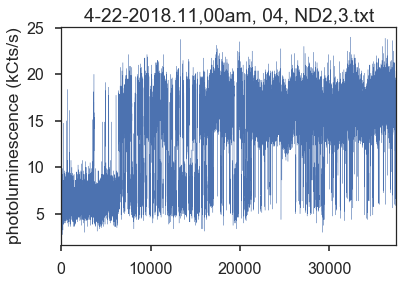

   Time (s) 2.2    2.2
0        58.088  22.75
1        58.092  21.75
2        58.096  19.25
3        58.100  21.50
4        58.104  15.50
       Time (s) 2.2    2.2
74994       358.064  20.50
74995       358.068  20.00
74996       358.072  14.75
74997       358.076  19.75
74998       358.080  18.50
1
Effective collection rate: 125.0 Hz
Time bin size: 0.008 sec


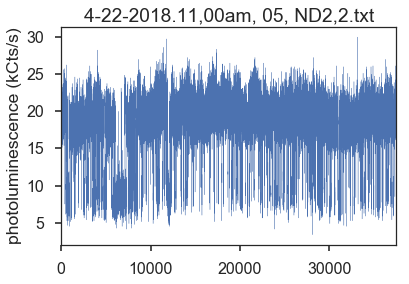

   Time (s) 2.0    2.0
0        38.860  23.50
1        38.864  22.50
2        38.868  30.50
3        38.872  24.50
4        38.876  30.75
       Time (s) 2.0    2.0
74994       338.836  25.75
74995       338.840  20.00
74996       338.844  22.00
74997       338.848  21.50
74998       338.852  23.75
1
Effective collection rate: 125.0 Hz
Time bin size: 0.008 sec


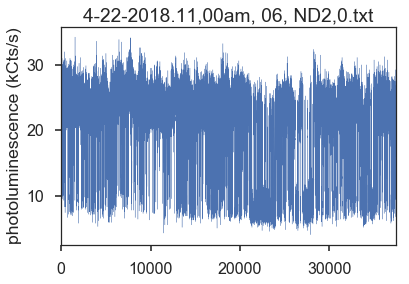

   Time (s) 1.6    1.6
0         0.008  70.50
1         0.012  66.50
2         0.016  66.75
3         0.020  73.50
4         0.024  74.50
       Time (s) 1.6    1.6
74704       298.824  63.25
74705       298.828  66.25
74706       298.832  63.00
74707       298.836  67.00
74708       298.840  60.50
1
Effective collection rate: 125.0 Hz
Time bin size: 0.008 sec


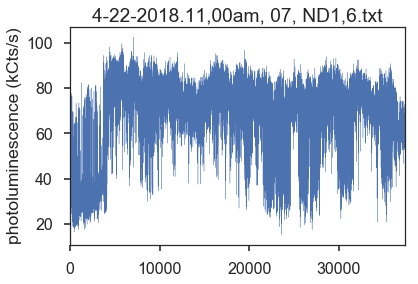

   Time (s) 1.5    1.5
0         0.008  88.00
1         0.012  88.75
2         0.016  76.50
3         0.020  81.75
4         0.024  79.50
       Time (s) 1.5    1.5
73955       295.828  27.25
73956       295.832  47.50
73957       295.836  27.25
73958       295.840  29.50
73959       295.844  35.50
1
Effective collection rate: 125.0 Hz
Time bin size: 0.008 sec


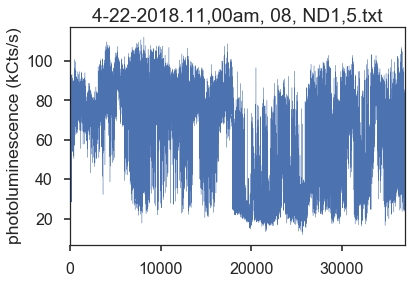

   Time (s) 1.4    1.4
0         0.002  118.0
1         0.003  106.0
2         0.004   97.0
3         0.005   89.0
4         0.006  104.0
       Time (s) 1.4    1.4
65217        65.219   92.0
65218        65.220  110.0
65219        65.221   90.0
65220        65.222   72.0
65221        65.223  112.0
1
Effective collection rate: 500.0 Hz
Time bin size: 0.002 sec


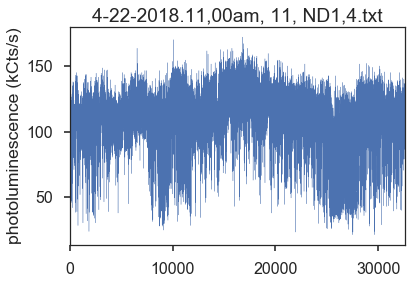

   Time (s) 1.3    1.3
0         4.602  150.0
1         4.603  136.0
2         4.604  137.0
3         4.605  124.0
4         4.606  131.0
       Time (s) 1.3   1.3
74994        79.596  28.0
74995        79.597  28.0
74996        79.598  30.0
74997        79.599  35.0
74998        79.600  25.0
1
Effective collection rate: 500.0 Hz
Time bin size: 0.002 sec


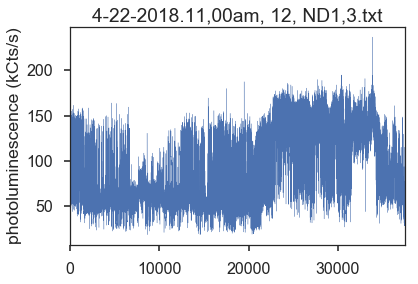

   Time (s) 1.2   1.2
0         0.002  74.0
1         0.003  80.0
2         0.004  52.0
3         0.005  86.0
4         0.006  80.0
       Time (s) 1.2   1.2
54133        54.135  71.0
54134        54.136  75.0
54135        54.137  62.0
54136        54.138  70.0
54137        54.139  78.0
1
Effective collection rate: 500.0 Hz
Time bin size: 0.002 sec


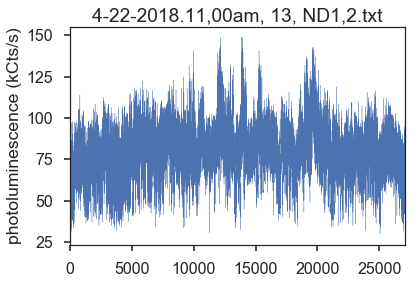

   Time (s) 1.0    1.0
0         0.002   97.0
1         0.003  132.0
2         0.004   95.0
3         0.005  112.0
4         0.006   79.0
       Time (s) 1.0   1.0
55714        55.716  66.0
55715        55.717  57.0
55716        55.718  55.0
55717        55.719  49.0
55718        55.720  38.0
1
Effective collection rate: 500.0 Hz
Time bin size: 0.002 sec


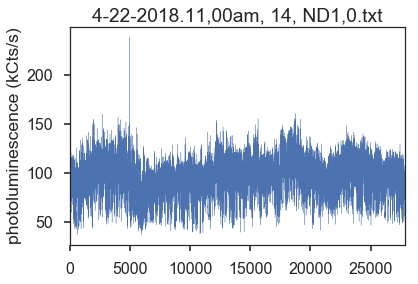

today: 2018-07-03


'C:\\Users\\Viva\\Documents\\analysis\\blinker_analysis\\power_dependence,QE4-22-2018.11,00am\\taken-2018-06-01'

In [5]:
os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kCts/s)'

rebins_to_do = 2 # number of times to rebin. **
newfilenames = copy(filenames)
timesettings = copy(NDlist)
fps= zeros_like(NDlist)

for i in range(len(filenames)):
    data = pd.read_csv(filenames[i],
                       skiprows=1,
                       header=None,
                       sep='\t',
                       names=[tname + ' ' + str(NDlist[i]),str(NDlist[i])],
                       usecols=[0,1])
    #data = data.set_index(tname)
    print(data.head())
    rebincount = 0
    
    # *** run this an appropriate number of times, can skip if not rebinning
    origfilenames = filenames
    for j in range(rebins_to_do):
        timecolname = tname + ' ' + str(NDlist[i])
        data = rebindata(data, colname=str(NDlist[i]), timecolname=timecolname)
        rebincount = rebincount + 1
        print(rebincount)
    timesettings[i] = data[timecolname][1]-data[timecolname][0]
    fps[i] = 1/timesettings[i]
    print('Effective collection rate: ' + str(fps[i]) + ' Hz')
    print('Time bin size: ' + str(timesettings[i]) + ' sec')
    newfilenames[i] = origfilenames[i] + ', ' + str(fps[i]) + ' Hz'

    #plt.scatter(x=data['Time (s) ' + str(NDlist[i])], y=str(NDlist[i]),linewidth=0.3)
    data[str(NDlist[i])].plot(linewidth=0.3)
    plt.ylabel('photoluminescence (kCts/s)')
    #plt.xlabel('Time(s)')
    plt.title(newfilenames[i])
    plt.show()
    
    if i > 0:
        alldata = pd.concat([alldata,data], axis=1)
    else:
        alldata = data        
 
dataname = dataname + ',' + str(rebins_to_do) + ' rebins'
#filename = filename.replace('\\','-')
#origfilename = filename
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

print('today: '+today)
os.getcwd()

In [6]:
alldata.head()

,2.4,Time (s) 2.4,2.3,Time (s) 2.3,2.2,Time (s) 2.2,2.0,Time (s) 2.0,1.6,Time (s) 1.6,1.5,Time (s) 1.5,1.4,Time (s) 1.4,1.3,Time (s) 1.3,1.2,Time (s) 1.2,1.0,Time (s) 1.0
0,6.000,0.000,8.00,0.000,22.250,0.000,23.000,0.000,68.500,0.000,88.375,0.000,112.0,0.000,143.0,0.000,77.0,0.000,114.5,0.000
1,5.625,0.008,5.75,0.008,20.375,0.008,27.500,0.008,70.125,0.008,79.125,0.008,93.0,0.002,130.5,0.002,69.0,0.002,103.5,0.002
2,4.625,0.016,5.75,0.016,18.000,0.016,29.000,0.016,73.625,0.016,78.875,0.016,100.0,0.004,129.5,0.004,78.0,0.004,85.5,0.004
3,5.625,0.024,7.00,0.024,20.625,0.024,26.750,0.024,68.875,0.024,80.500,0.024,99.0,0.006,87.5,0.006,89.0,0.006,98.0,0.006
4,5.750,0.032,7.00,0.032,19.375,0.032,27.375,0.032,70.000,0.032,58.375,0.032,112.5,0.008,114.5,0.008,84.5,0.008,93.0,0.008


In [7]:
alldata.tail()

,2.4,Time (s) 2.4,2.3,Time (s) 2.3,2.2,Time (s) 2.2,2.0,Time (s) 2.0,1.6,Time (s) 1.6,1.5,Time (s) 1.5,1.4,Time (s) 1.4,1.3,Time (s) 1.3,1.2,Time (s) 1.2,1.0,Time (s) 1.0
37494,NaN,NaN,16.125,299.952,22.375,299.952,25.750,299.952,NaN,NaN,NaN,NaN,NaN,NaN,46.5,74.988,NaN,NaN,NaN,NaN
37495,NaN,NaN,15.625,299.960,19.750,299.960,27.500,299.960,NaN,NaN,NaN,NaN,NaN,NaN,44.5,74.990,NaN,NaN,NaN,NaN
37496,NaN,NaN,16.375,299.968,19.250,299.968,22.125,299.968,NaN,NaN,NaN,NaN,NaN,NaN,32.0,74.992,NaN,NaN,NaN,NaN
37497,NaN,NaN,16.375,299.976,20.250,299.976,22.875,299.976,NaN,NaN,NaN,NaN,NaN,NaN,28.0,74.994,NaN,NaN,NaN,NaN
37498,NaN,NaN,16.000,299.984,17.250,299.984,21.750,299.984,NaN,NaN,NaN,NaN,NaN,NaN,32.5,74.996,NaN,NaN,NaN,NaN


In [8]:
strNDlist = []
for ND in NDlist:
    strNDlist.append(str(ND))
data = alldata[strNDlist]
data.head()

,2.4,2.3,2.2,2.0,1.6,1.5,1.4,1.3,1.2,1.0
0,6.000,8.00,22.250,23.000,68.500,88.375,112.0,143.0,77.0,114.5
1,5.625,5.75,20.375,27.500,70.125,79.125,93.0,130.5,69.0,103.5
2,4.625,5.75,18.000,29.000,73.625,78.875,100.0,129.5,78.0,85.5
3,5.625,7.00,20.625,26.750,68.875,80.500,99.0,87.5,89.0,98.0
4,5.750,7.00,19.375,27.375,70.000,58.375,112.5,114.5,84.5,93.0


In [9]:
strNDlist

['2.4', '2.3', '2.2', '2.0', '1.6', '1.5', '1.4', '1.3', '1.2', '1.0']

In [10]:
print max(data.max())
print min(data.min())

238.5
2.0


histdata initialized


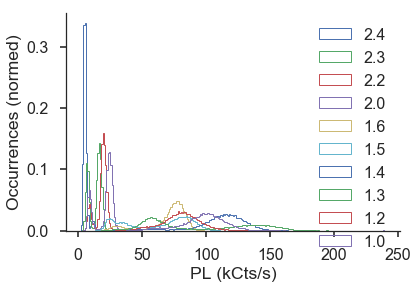

In [11]:
stepsize = 1
# adding a stepsize to the max is a workaround to a bug
binsequence= frange(min(data.min()),max(data.max())+stepsize,stepsize)

try:
    del histdata
except NameError:
    pass
#histdata=pd.DataFrame(columns=['ND', PLname, "Occurrences"])

histdict = []
for i in range(len(strNDlist)):
    plt.hist(data[strNDlist[i]], bins=binsequence,  histtype='step', linewidth=1, label=strNDlist[i], normed=True)
    newhistdata, toss = histc(data[strNDlist[i]], bins=np.asarray(binsequence))
    NDlisttemp = [NDlist[i]] * len(binsequence)
    ## Norm the newhistdata
    #   adding a stepsize to the max was a workaround to a bug
    #   now we remove that last bin, which should have been empty (but it's so buggy it wasn't empty)
    newhistdatanormed = manualnorm(newhistdata[:-1], stepsize)
    
    try:
        # append histogram to dataframe histdata

        histdata = histdata.append(pd.DataFrame(transpose([NDlisttemp[:-1], binsequence[:-1],newhistdatanormed.tolist()])))
#        print "appended"
    except NameError:
        histdata = pd.DataFrame(transpose([NDlisttemp[:-1], binsequence[:-1],newhistdatanormed.tolist()]))
        print "histdata initialized"
histdata = histdata.rename(index=str, columns={0: 'ND', 1: PLname, 2:"Probability"})           
tabledata = histdata.pivot("ND", PLname, "Probability")

# In terms of laser intensity instead of optical density
powertabledata = tabledata.join(filterwheel.set_index('ND')).set_index('Power (W)')

#sns.distplot(data[strNDlist[9]], bins=numbins, kde=True, rug=False, hist_kws={"histtype": "step", "linewidth": 1, "alpha": 1, "color": "k"});
plt.xlabel('PL (kCts/s)')
plt.ylabel('Occurrences (normed)')
#ax = plt.gca()
#ax.set_yscale('symlog', linthreshy=1)
#ax.set_xscale('log')
sns.despine()
plt.legend()
plt.show()


In [12]:
NDlist

[2.4, 2.3, 2.2, 2.0, 1.6, 1.5, 1.4, 1.3, 1.2, 1.0]

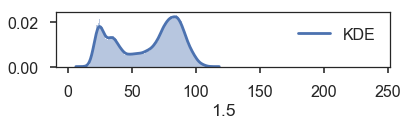

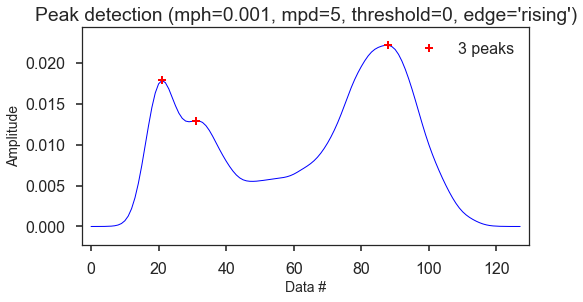

array([ 24.54035433,  33.36909449,  83.69291339])

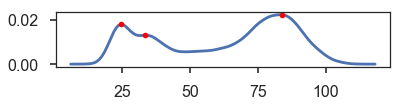

In [44]:
## I want to extract the peaks of these data
# https://stackoverflow.com/questions/37374983/get-data-points-from-seaborn-distplot

i = 5

# bw = bandwidth for calculating kde
bw = 2
# mph = minimum peak height
mph = .001
# mpd = minimum peak distance
mpd = 5

plt.figure()
output1 = sns.distplot(data[strNDlist[i]],bins=binsequence,kde_kws={'bw':bw, 'label':'KDE'},).get_lines()[0].get_data()

## http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb



ind= detect_peaks(output1[1], valley=False, show=True, mph=mph, mpd=mpd)
#print ind

figure()
plot(output1[0], output1[1])
plot(output1[0][ind], output1[1][ind], 'r.')
output1[0][ind]

today: 2018-07-03
C:\Users\Viva\Documents\analysis\blinker_analysis\power_dependence,QE4-22-2018.11,00am\taken-2018-06-01
0: 2.4
1: 2.3
2: 2.2
3: 2.0
4: 1.6
5: 1.5
6: 1.4
7: 1.3
8: 1.2
9: 1.0


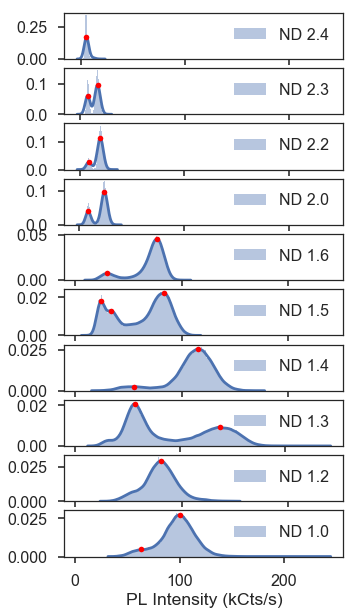

In [45]:
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

print('today: '+today)
print os.getcwd()

peaksPL = {NDlist[0]:None}
peaksprob = {NDlist[0]:None}

plt.figure(figsize=(5,10))
title(dataname)
for i in range(len(strNDlist)):
    print str(i) + ': ' + strNDlist[i]
    ax = plt.subplot(len(strNDlist), 1, i+1)
    output = sns.distplot(data[strNDlist[i]],
                          bins=binsequence, 
                          label='ND ' + strNDlist[i],
                          kde_kws={'bw':bw}).get_lines()[0].get_data()
    ind= detect_peaks(output[1], valley=False, show=False, mph=mph, mpd=mpd)
    ax.plot(output[0][ind], output[1][ind], 'r.')
    peaksPL[NDlist[i]] = output[0][ind]
    peaksprob[NDlist[i]] =output[1][ind]
    legend()

xlabel(PLname);

plt.savefig(today + ',' + dataname+',PLvspowerhists.pdf', bbox_inches='tight')
plt.savefig(today + ',' + dataname+',PLvspowerhists.png', bbox_inches='tight', dpi=200)

In [46]:
peaksPL

{1.0: array([  63.36614173,  100.26377953]),
 1.2: array([ 80.4488189]),
 1.3: array([  57.47244094,  137.50393701]),
 1.4: array([  55.16535433,  115.30314961]),
 1.5: array([ 24.54035433,  33.36909449,  83.69291339]),
 1.6: array([ 30.30511811,  77.37204724]),
 2.0: array([  8.64566929,  23.9488189 ]),
 2.2: array([  8.62795276,  19.57677165]),
 2.3: array([  6.96062992,  16.38582677]),
 2.4: array([ 4.92913386])}

In [47]:
peaksprob

{1.0: array([ 0.00462174,  0.02730272]),
 1.2: array([ 0.02956145]),
 1.3: array([ 0.02065942,  0.00915869]),
 1.4: array([ 0.00249472,  0.02535287]),
 1.5: array([ 0.01785759,  0.01293488,  0.0221657 ]),
 1.6: array([ 0.00761521,  0.04587416]),
 2.0: array([ 0.03956668,  0.09709585]),
 2.2: array([ 0.02694509,  0.11448627]),
 2.3: array([ 0.06014365,  0.09537666]),
 2.4: array([ 0.16938117])}

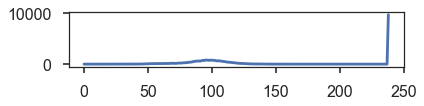

In [48]:
# The bug!
plot(newhistdata);

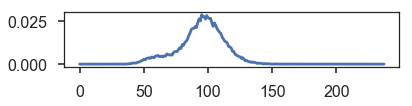

In [49]:
# Dealt with the bug!
plot(newhistdatanormed);

In [50]:
histdata.head()

,ND,PL Intensity (kCts/s),Probability
0,2.4,2.0,0.008645
1,2.4,3.0,0.107806
2,2.4,4.0,0.336065
3,2.4,5.0,0.338065
4,2.4,6.0,0.125935


In [51]:
NDlist

[2.4, 2.3, 2.2, 2.0, 1.6, 1.5, 1.4, 1.3, 1.2, 1.0]

In [52]:
powlist = []
for ND in NDlist:
    powlist.append(filterwheel.loc[filterwheel['ND']==ND]['Power (W)'].values[0]) 

powlist

[2.7399999999999995e-05,
 3.8299999999999996e-05,
 4.7899999999999999e-05,
 7.0599999999999995e-05,
 0.00022499999999999999,
 0.00030600000000000001,
 0.000377,
 0.00054800000000000009,
 0.00064000000000000005,
 0.00099500000000000001]

In [53]:
#filterwheel.set_index('ND')

# previously made NDlistwrap manually
"""
NDlistwrap = [2.45, 2.35, 2.25, (2.2+2.0)/2, (2.0+1.6)/2, 1.55, 1.45, 1.35, 1.25, (1.2+1.0)/2, 1.0-0.05]

NDlistwrap[::-1]
"""

'\nNDlistwrap = [2.45, 2.35, 2.25, (2.2+2.0)/2, (2.0+1.6)/2, 1.55, 1.45, 1.35, 1.25, (1.2+1.0)/2, 1.0-0.05]\n\nNDlistwrap[::-1]\n'

In [54]:
# create a listwrap that wraps around the list 
# This is what I need for pcolormesh.
def listwrap(currentlist):
    listwrap = [0] * (len(currentlist)+1)
    for i in range(len(currentlist)):
        try:
            listwrap[i+1] = ((currentlist[i]+currentlist[i+1])/2)
        except IndexError:
            pass
    topstep = listwrap[2]-listwrap[1]
    listwrap[0]=listwrap[1]-topstep
    botstep = listwrap[-2]-listwrap[-3]
    listwrap[-1]=listwrap[-2]+botstep
    return listwrap

In [55]:
NDlistwrap = listwrap(NDlist)
NDlistwrap[::-1]

[0.9500000000000002,
 1.1,
 1.25,
 1.35,
 1.45,
 1.55,
 1.8,
 2.1,
 2.25,
 2.3499999999999996,
 2.4499999999999993]

In [56]:
tabledata

PL Intensity (kCts/s),2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0
ND,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000036,0.0
1.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000027,0.0,0.0,0.0,0.0,0.0,0.000027,0.000000,0.0
1.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2.0,0.000000,0.000000,0.000267,0.004027,0.022934,0.054108,0.065388,0.052108,0.029867,0.012987,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2.2,0.000000,0.000027,0.000560,0.004347,0.016134,0.036401,0.043601,0.036081,0.019521,0.009920,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2.3,0.000027,0.001387,0.015360,0.063068,0.110323,0.097469,0.046935,0.016027,0.005307,0.004000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [57]:
peaksPL

{1.0: array([  63.36614173,  100.26377953]),
 1.2: array([ 80.4488189]),
 1.3: array([  57.47244094,  137.50393701]),
 1.4: array([  55.16535433,  115.30314961]),
 1.5: array([ 24.54035433,  33.36909449,  83.69291339]),
 1.6: array([ 30.30511811,  77.37204724]),
 2.0: array([  8.64566929,  23.9488189 ]),
 2.2: array([  8.62795276,  19.57677165]),
 2.3: array([  6.96062992,  16.38582677]),
 2.4: array([ 4.92913386])}

In [58]:
peaksPL.get(2.4)

array([ 4.92913386])

Text(0.5,0,u'ND')

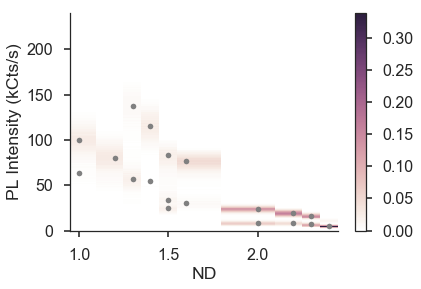

In [59]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#cmap = sns.color_palette("Grey", as_cmap=True)

plt.figure(figsize=(6,4))
plt.pcolormesh(NDlistwrap[::-1], binsequence, transpose(tabledata), cmap=cmap)
sns.despine()
colorbar()

for i in range(len(NDlist)):
    plot([NDlist[i]]*len(peaksPL.get(NDlist[i])),peaksPL.get(NDlist[i]), '.', color='grey')

ylim(ymin=0)
plt.ylabel(PLname)
plt.xlabel('ND')

In [60]:
powlist

[2.7399999999999995e-05,
 3.8299999999999996e-05,
 4.7899999999999999e-05,
 7.0599999999999995e-05,
 0.00022499999999999999,
 0.00030600000000000001,
 0.000377,
 0.00054800000000000009,
 0.00064000000000000005,
 0.00099500000000000001]

In [61]:
powlistwrap = listwrap(powlist)
powlistwrap

[2.26e-05,
 3.2849999999999999e-05,
 4.3099999999999997e-05,
 5.9249999999999997e-05,
 0.00014779999999999999,
 0.0002655,
 0.00034150000000000001,
 0.00046250000000000002,
 0.00059400000000000013,
 0.00081750000000000008,
 0.001041]

In [62]:
lowerpeaks = np.zeros_like(NDlist)
keepgoing = [False] * len(NDlist)
for i in range(len(NDlist)):
#    print peaksPL.get(NDlist[i]).min()
    lowerpeaks[i] = peaksPL.get(NDlist[i]).min()
    # set keepgoign to true if there  is still another value
lowerpeaks

array([  4.92913386,   6.96062992,   8.62795276,   8.64566929,
        30.30511811,  24.54035433,  55.16535433,  57.47244094,
        80.4488189 ,  63.36614173])

In [63]:
#collect the upperpeaks

upperpeaks = np.zeros_like(NDlist)
for i in range(len(NDlist)):
#    print peaksPL.get(NDlist[i]).min()
    upperpeaks[i] = peaksPL.get(NDlist[i]).max()
    # set keepgoign to true if there  is still another value
# *** not quite automated
upperpeaks = upperpeaks[:-2]
powlistforupperpeaks = powlist[:-2]
upperpeaks

array([   4.92913386,   16.38582677,   19.57677165,   23.9488189 ,
         77.37204724,   83.69291339,  115.30314961,  137.50393701])

In [64]:
from scipy.optimize import curve_fit
import scipy
print(scipy.__version__)
# need at least version 14.0 of scipy.

def expfit(t, A, tau):
    return (A * np.exp(t/(-tau)))

def powlaw(t, C, m):
    return C * t**(-m)

# laser power P, saturation power Psat
def satcurve(P,Psat,signalmax):
    return signalmax/(1 + Psat/P)

0.17.1


In [65]:
powlist

[2.7399999999999995e-05,
 3.8299999999999996e-05,
 4.7899999999999999e-05,
 7.0599999999999995e-05,
 0.00022499999999999999,
 0.00030600000000000001,
 0.000377,
 0.00054800000000000009,
 0.00064000000000000005,
 0.00099500000000000001]

Lower peaks saturation at 0.000617170147721 +/- 0.000388417532396 W
Upper peaks saturation at 0.000957198187917 +/- 0.000346341299756 W


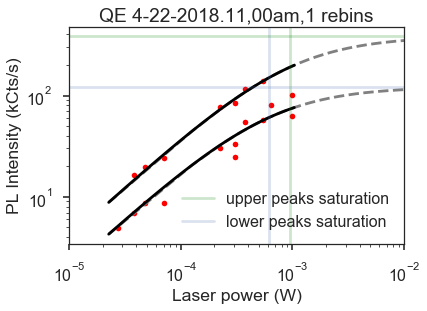

In [66]:
x = np.linspace(start = min(powlistwrap), stop = max(powlistwrap),num =100)
x_extended = np.linspace(start = min(powlistwrap), stop = 30*max(powlistwrap),num =300)

# curvefit
lowerpeaksparam, lowerpeakspcov = curve_fit(satcurve, xdata=powlist, ydata=lowerpeaks,p0 = None)
lowerpeaksfit = satcurve(x,lowerpeaksparam[0],lowerpeaksparam[1])
lowerpeaksfitextended = satcurve(x_extended,lowerpeaksparam[0],lowerpeaksparam[1])

print 'Lower peaks saturation at ' + str(lowerpeaksparam[0]) + ' +/- ' + str(np.sqrt(lowerpeakspcov[0,0])) + ' W'

# curvefit upperpeaks
upperpeaksparam, upperpeakspcov = curve_fit(satcurve, xdata=powlistforupperpeaks, ydata=upperpeaks,p0 = None)
upperpeaksfit = satcurve(x,upperpeaksparam[0],upperpeaksparam[1])
upperpeaksfitextended = satcurve(x_extended,upperpeaksparam[0],upperpeaksparam[1])

print 'Upper peaks saturation at ' + str(upperpeaksparam[0]) + ' +/- ' + str(np.sqrt(upperpeakspcov[0,0])) + ' W'


figure(figsize=(6,4))
for i in range(len(NDlist)):
    plot([powlist[i]]*len(peaksPL.get(NDlist[i])),peaksPL.get(NDlist[i]), '.', color='r') # plot peaks
plot(x_extended,lowerpeaksfitextended, '--', color='grey') # plot curvefit out a bit further
plot(x,lowerpeaksfit, 'k') # plot curvefit where I actually did the curvefit.
plot(x_extended,upperpeaksfitextended, '--', color='grey') # plot curvefit out a bit further
plot(x,upperpeaksfit, 'k') # plot curvefit where I actually did the curvefit.
xlabel('Laser power (W)')
ylabel(PLname)
plt.axvline(upperpeaksparam[0], label="upper peaks saturation", color='g', alpha=.2)
plt.axvline(lowerpeaksparam[0], label="lower peaks saturation", alpha=.2)
plt.axhline(upperpeaksparam[1], color='g', alpha=.2)
plt.axhline(lowerpeaksparam[1], alpha=.2)


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
title(dataname)
xlim(1e-5,xmax=1e-2)

legend();

In [36]:
lowerpeaksparam[0] - np.sqrt(lowerpeakspcov[0,0])

0.00022875261532526501

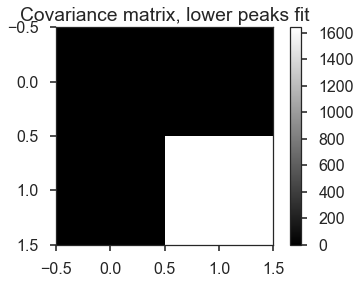

It's ok to use the uncertainties as long as there aren't strong off-diagonal values.


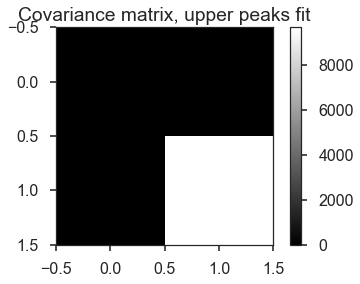

It's ok to use the uncertainties as long as there aren't strong off-diagonal values.


In [37]:
plt.imshow(abs(lowerpeakspcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, lower peaks fit')
plt.show()
print("It's ok to use the uncertainties as long as there aren't strong off-diagonal values.")

plt.imshow(abs(upperpeakspcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, upper peaks fit')
plt.show()
print("It's ok to use the uncertainties as long as there aren't strong off-diagonal values.")

In [38]:
NDlist

[2.4, 2.3, 2.2, 2.0, 1.6, 1.5, 1.4, 1.3, 1.2, 1.0]

In [39]:
peaksPL

{1.0: array([  63.36614173,  100.26377953]),
 1.2: array([ 80.4488189]),
 1.3: array([  57.47244094,  137.50393701]),
 1.4: array([  55.16535433,  115.30314961]),
 1.5: array([ 24.54035433,  83.69291339]),
 1.6: array([ 30.30511811,  77.37204724]),
 2.0: array([  8.64566929,  23.9488189 ]),
 2.2: array([  8.62795276,  19.57677165]),
 2.3: array([  6.96062992,  16.38582677]),
 2.4: array([ 4.92913386])}

today: 2018-07-03
C:\Users\Viva\Documents\analysis\blinker_analysis\power_dependence,QE4-22-2018.11,00am\taken-2018-06-01
Lower peaks saturation at 617.170147721 ± 0.000388417532396 μW
Upper peaks saturation at 957.198187917 ± 0.000346341299756 μW
2018-07-03,QE 4-22-2018.11,00am,1 rebins,doublesaturationcurve


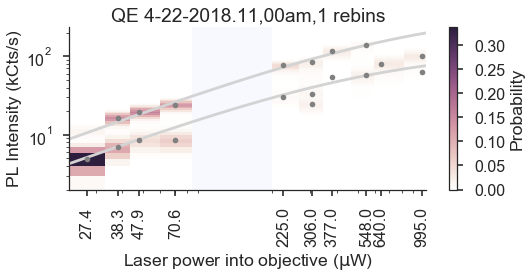

In [67]:
os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

print('today: '+today)
print os.getcwd()

#cmap = sns.cubehelix_palette(n_colors = 1, start=0, rot=1, light=1, as_cmap=True)
cmap = sns.cubehelix_palette( light=1, as_cmap=True)
#cmap = sns.color_palette("Grey", as_cmap=True)

figure(figsize=(8,3))
plt.pcolormesh(powlistwrap[::-1],  binsequence, transpose(powertabledata), cmap=cmap)
sns.despine()
cbar = colorbar(drawedges=False)
cbar.set_label('Probability')



#ylim(ymin=0)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

xticks(powlist, [power*1000*1000 for power in powlist],rotation='vertical')
#xticks(powlist, [pow for pow in powlist],rotation='vertical')

plt.ylabel(PLname)
plt.xlabel('Laser power into objective ($\mathrm{\mu}$W)')
#plt.xlabel('Laser power into objective (W)')
title(dataname)


# Cover section that has no data
plt.axvline(x=1.3e-4, linewidth=80, color='ghostwhite')

# plot curvefits
plot(x,lowerpeaksfit, '-', color='lightgrey')
plot(x,upperpeaksfit, '-', color='lightgrey') 

# plot points at the peaks
for i in range(len(NDlist)):
    plot([powlist[i]]*len(peaksPL.get(NDlist[i])),peaksPL.get(NDlist[i]), '.', color='grey')

print('Lower peaks saturation at ' + str(lowerpeaksparam[0]*1000*1000)
      + ' ± ' + str(np.sqrt(lowerpeakspcov[0,0])) + ' μW')
print('Upper peaks saturation at ' + str(upperpeaksparam[0]*1000*1000)
      + ' ± ' + str(np.sqrt(upperpeakspcov[0,0])) + ' μW')

#savefig
plt.savefig(today + ',' + dataname+',doublesaturationcurve.pdf', bbox_inches='tight')
plt.savefig(today + ',' + dataname+',doublesaturationcurve.png', bbox_inches='tight', dpi=200)
print(today + ',' + dataname+',doublesaturationcurve')

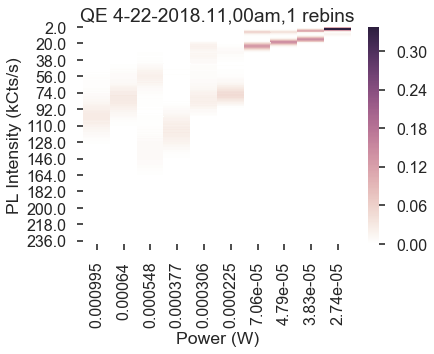

In [41]:
## The heatmap isn't as customizable but it's more automated 
## so it's a good check that I entered in the variables correctly.
sns.heatmap(transpose(powertabledata), cmap = cmap)
ylabel(PLname)
title(dataname)

## decrease number of ticks on x axis.
ax = plt.gca()
#ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
#ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

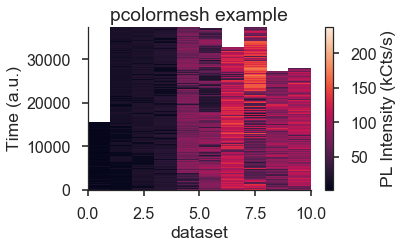

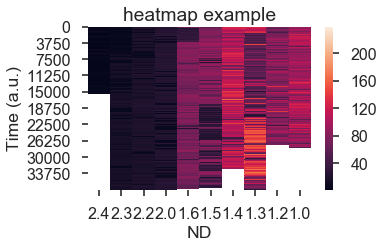

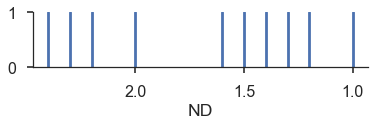

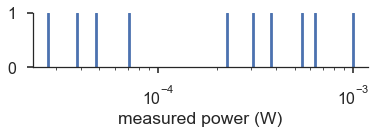

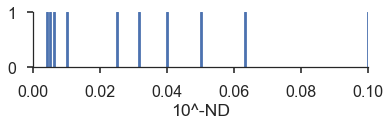

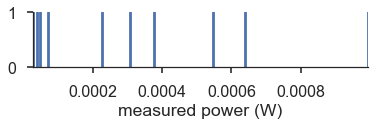

In [42]:
## This cell doesn't have to be run. Just some thoughts about the data system.

figure(figsize(5,3))
plt.pcolormesh(data)
sns.despine()

cbar =colorbar()
cbar.set_label(PLname)
title('pcolormesh example')
ylabel('Time (a.u.)')
xlabel('dataset')
plt.show()

figure()
sns.heatmap(data, linewidths=0)
title('heatmap example')
ylabel('Time (a.u.)')
xlabel('ND')


# https://stackoverflow.com/questions/49020709/seaborn-heatmap-with-numerical-axes
# You cannot "convince" heatmap not to produce a categorical plot. 
# Best use another image plot, which uses numerical axes. For example, use a pcolormesh plot. 
# The assumption is of course that the columns and rows are equally spread. 


## Some thoughts about figure spacing
plt.figure(figsize(6,1))
for ND in NDlist:
    plt.axvline(x=ND)
sns.despine()
xlabel('ND')
plt.gca().invert_xaxis()
    
plt.figure()
for thispower in powlist:
   # print thispower
    plt.axvline(x=thispower)
#plt.xlim(xmin=min(powlist), xmax = max(powlist))
sns.despine()
ax = plt.gca()
ax.set_xscale('log')
xlabel('measured power (W)' )    
    
plt.figure()
for ND in NDlist:
    plt.axvline(x=10**-ND)
plt.xlim(xmax=10**-min(NDlist))   
sns.despine()
xlabel('10^-ND')

plt.figure()
for thispower in powlist:
  #  print thispower
    plt.axvline(x=thispower)
plt.xlim(xmin=min(powlist), xmax = max(powlist))
sns.despine()
xlabel('measured power (W)' )




plt.show()